## Question 1

### The data in the table is believed to obey a model of the form $y_i = a x_{i}^2 + bx_i + c + e_i$ with $e_i \approx N(0,\sigma^2)$. 

Estimate a,b,c  and assign errorbars to estimates.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from sklearn.linear_model import LinearRegression

In [2]:
time = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
y = np.array([-2.73, -2.71, -2.65, -0.87, -3.10, -1.03, 0.63, 1.46, 5.90, 8.38])

Text(0.5, 1.0, 'Data in Question 1')

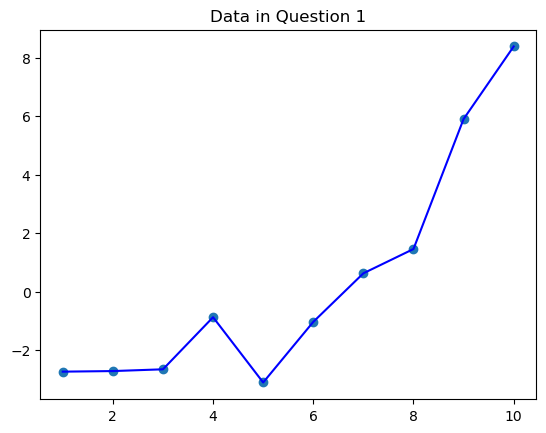

In [3]:
plt.scatter(time,y)
plt.plot(time, y, linestyle='-', color='blue', label='lines')
plt.title("Data in Question 1")

To solve this problem, we need to know the prior probability and the likelihood function to solve the posterior probability. 

#### We also need to express the model in the matrix form $y= \matrix{A}\cdot\vec{\beta} + \vec{e}$

$
\matrix{A} = \begin{bmatrix}
1 & t_1 & t_{1}^2  \\
1 & t_2 & t_{2}^2  \\
1 & t_3 & t_{3}^2   \\
: & : & : \\
1 & t_{10} & t_{10}^2 
\end{bmatrix}
$
$
\hspace{4em}
$
$
\vec{\beta} = \begin{bmatrix}
c \\
b \\
a \\
\end{bmatrix}
$

#### First, the prior probability is: $prob(a,b,c,\sigma) \propto \frac{1}{\sigma}$

#### The likelihood function is: $prob(data|a,b,c,\sigma) = \frac{1}{(2\pi)^5\sigma^{10}} \exp(-\frac{1}{2\sigma^2}(\vec{y}-\matrix{A}\vec{\beta})^T (\vec{y}-\matrix{A}\vec{\beta})) $

#### $ prob(a,b,c,\sigma | data) \propto  prob(data|a,b,c,\sigma) \cdot prob(a,b,c,\sigma) $

#### Therefore, the posterior probability is $prob(a,b,c,\sigma | data) \propto \frac{1}{\sigma^{11}} \exp(-\frac{1}{2\sigma^2}(\vec{y}-\matrix{A}\vec{\beta})^T (\vec{y}-\matrix{A}\vec{\beta}))$

### To solve for the most probable values of a,b,c we need to take the derivative of the posterior and set it equal to zero. 

#### First, integrate out the sigma to get: $prob(\beta, data) = \int_{-\infty}^{\infty} Prob(\beta, log(\sigma) | data) d(log\sigma) $

#### This integral simplifies and is proportional to $prob(\beta, data) \propto \nu(\beta)^{-\kappa/2}$

#### where $\kappa$ is the number of parameters or the length of $\vec{\beta}$ and $\nu = (\matrix{A}\vec{\beta} - \vec{y})^{T}(\matrix{A}\vec{\beta} - \vec{y})$

#### Therefore, $prob(\beta, data) \propto \frac{1}{(\vec{e}^{T} \vec{e})^{-3/2}} $ where $\vec{e} = (\matrix{A}\vec{\beta} - \vec{y})$

$prob(\beta, \sigma | data) \propto \frac{1}{\sigma^{11}} exp(\frac{-1}{2 \sigma^2} (\vec{y}-\matrix{A}\vec{\beta})^T (\vec{y}-\matrix{A}\vec{\beta}))$

#### Next, take the logarithm of the posterior probability $log(prob(\beta, \sigma | data)) $

#### This gives: $\mathcal{L} = -\frac{1}{2 \sigma^2} (\vec{y}-\matrix{A}\vec{\beta})^T (\vec{y}-\matrix{A}\vec{\beta})) - 11 log(\sigma) $

#### Taking the partial derivative with respect to $\vec{\beta}$  and setting equal to zero: 

## $\frac{\partial\mathcal{L}}{\partial\beta} = \frac{1}{\sigma^2} (\matrix{A}\hat\beta-\vec{y})^{T} \matrix{A} = 0$

results in $\hat{\beta} = (\matrix{A^T}\cdot\matrix{A})^{-1} A^{T} \cdot \vec{y}$

### Compute the $\hat{\beta}$ vector through the following calculation: $\hat{\beta} = (\matrix{A^T}\cdot\matrix{A})^{-1} A^{T} \cdot \vec{y}$

In [15]:
#define A as the design matrix
A = np.column_stack((np.ones(10),time, time**2))

In [16]:
#compute the inverse of Atranspose times A

AAinverse = np.linalg.inv(np.transpose(A) @ A)

#compute Atranspose times y vector
At_y = np.transpose(A) @ y 

beta_hat = AAinverse @ At_y

In [17]:
c= beta_hat[0]
b= beta_hat[1]
a= beta_hat[2]

### We have found $\hat{\beta} = \begin{bmatrix}
c = -1.025 \\
b = -1.31 \\
a = 0.222 \\
\end{bmatrix}$ 

so we have estimates for a, b, and c. 

### Now we have to assign appropriate errorbars to estimates of a,b,c

### $\hat\sigma^2$ gives the variance squared and $\hat\sigma$ is the standard deviation. 


## To calculate $\hat\sigma^2$ we must take the derivative of the posterior with respect to sigma and set to zero $\frac{\partial\mathcal{L}}{\partial\sigma} = 0 $

### $\frac{\partial\mathcal{L}}{\partial\sigma} = \frac{-(N+1)}{\hat\sigma} + \frac{1}{\hat\sigma^{3}} [(\hat\beta-\hat\beta)\matrix{A}^T\matrix{A}(\hat\beta -\hat\beta) + (\vec{y}-\matrix{A}\hat\beta)^T(\vec{y}-\matrix{A}\hat\beta)] = 0 $

### After simplifying we are left with

## $\hat\sigma^2 = \frac{(\vec{y}-\matrix{A}\vec{\beta})^T (\vec{y}-\matrix{A}\vec{\beta}))}{N+1}$

where N=number of data points

In [18]:
#calculate residuals 

N = len(y)

residuals = y - A @ beta_hat
sigma_squared = (np.transpose(residuals) @ residuals)/(N+1)
sigma = np.sqrt(sigma_squared)

In [19]:
print("sigma hat squared is:", sigma_squared)
print("sigma hat, the standard deviation is:", np.sqrt(sigma_squared))

sigma hat squared is: 0.6567256611570249
sigma hat, the standard deviation is: 0.8103861185614083


In [20]:
e = 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-1*(y)**2/(2*sigma_squared))

print('e is the array of errorbars:', e)

e is the array of errorbars: [1.69007688e-03 1.83603659e-03 2.34541021e-03 2.76661068e-01
 3.27083312e-04 2.19497729e-01 3.63900408e-01 9.71407848e-02
 1.52140139e-12 2.96772639e-24]


Text(0.5, 1.0, 'Data in Question 1')

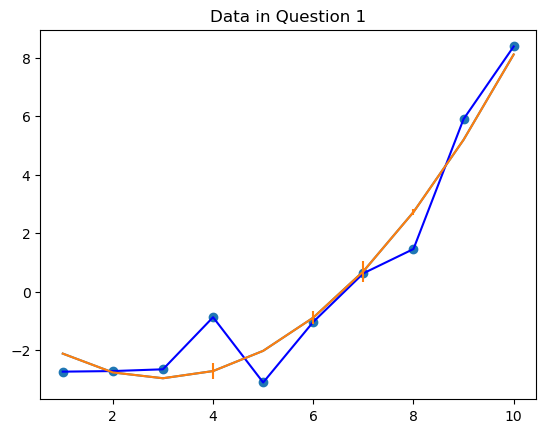

In [21]:
plt.scatter(time,y)
plt.plot(time, a*time**2+b*time+c)
plt.plot(time, y, linestyle='-', color='blue', label='lines')
plt.errorbar(time, a*time**2+b*time+c, yerr=e)
plt.title("Data in Question 1")

### Now, we must estimate the value of y(t=12) we can predict this through $prob(y_{12}|\beta) = \delta([1, 12, 12^2] \hat\beta - y(12))$ but we don't know the actual value of y(t=12) 

### We integrate out sigma using the posterior: 

$prob(\vec{\beta} | data) = \int_0^{\infty}d\sigma prob(\vec{\beta}, \sigma | data) \propto [\nu + (\vec{\beta} - \hat\beta)^{T} \matrix{H}(\vec{\beta} - \hat\beta)]^{-N/2}$

### $prob(y(12)|data) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} da db dc ((\delta(y(12)) - \matrix{A}\vec{\beta})[\nu + (\vec{\beta} - \hat\beta)^{T} \matrix{H}(\vec{\beta} - \hat\beta)]^{-N/2}$

where $\nu = N-k, H=\frac{\matrix{A}^T\matrix{A}}{S^2}$

In [22]:
#predict the value for y(12)

t_12=12
A_12 = [1, t_12, t_12**2]

y_12 = A_12 @ beta_hat

In [23]:
print("Estimated value for y at time=12 is", y_12)

Estimated value for y at time=12 is 15.270772727272746


### Next we want to calculate the variance and standard error of the prediction for y(t=12)


In [56]:
#variance of the prediction for t=12

N = 10
k = 3
nu = N-k

s_squared = (np.transpose(y-A @ beta_hat) @ (y-A@beta_hat))/nu

AtA = np.transpose(A) @ A

H_matrix = s_squared * AtA

covariance_mat = np.linalg.inv(H_matrix)

#variance prediction of y(12)

var_pred_y12 = A_12 @ covariance_mat @ np.transpose(A_12)
std_pred_y12 = np.sqrt(var_pred_y12)

In [58]:
std_pred_y12

1.647620443623523

In [57]:
covariance_mat

array([[ 1.34044257, -0.50872218,  0.04037478],
       [-0.50872218,  0.23380666, -0.02018739],
       [ 0.04037478, -0.02018739,  0.00183522]])

### So, I got an estimated value of $y(t=12) \sim 15.27$ with standard deviation of $\sigma \sim 1.648$